In [1]:
import numpy as np
import matplotlib.pyplot as plt

import math

class Sphere:
    def __init__(self, center, radius, color):
        self.center = center
        self.radius = radius
        self.color = color
        
viewport_size = 1
d = 1
Cw = 300
Ch = 300
Vw = 1
Vh = 1
inf = 10**9
O = (0, 0, 0)
BACKGROUND_COLOR = (255, 255, 255)

In [2]:
def CanvasToViewport(x, y):
    return (x*Vw/Cw, y*Vh/Ch, d)

In [3]:
def TraceRay(O, D, t_min, t_max, spheresObj):
    closest_t = 10**9
    closest_sphere = None
    for sphere in spheresObj:
        t1, t2 = IntersectRaySphere(O, D, sphere)
        if t1 != None and t1 >= t_min and t1 <=  t_max and t1 < closest_t:
            closest_t = t1
            closest_sphere = sphere
        
        if t2 != None and t2 >= t_min and t2 <=  t_max and t2 < closest_t :
            closest_t = t2
            closest_sphere = sphere

    if closest_sphere == None :
        return BACKGROUND_COLOR
    
    return closest_sphere.color

In [4]:
def IntersectRaySphere(O, D, sphere): 
    r = sphere.radius
    CO = [O[0] - sphere.center[0], O[1] - sphere.center[1], O[2] - sphere.center[2]]
    a = dot(D, D)
    b = 2 * dot(CO, D)
    c = dot(CO, CO) - r*r
    discriminant = b*b - 4*a*c
    if discriminant < 0:
        return None, None
    t1 = (-b + math.sqrt(discriminant)) / (2*a)
    t2 = (-b - math.sqrt(discriminant)) / (2*a)
    return t1, t2

In [5]:
def dot(a, b):
    return a[0]*b[0] + a[1]*b[1] + a[2]*b[2]

def putPixel(x, y, color, matrix):
    Sx = Cw//2 + x
    Sy = Ch//2 - y
    if Sx >= Cw or Sy >= Ch:
        return
    matrix[Sx][Sy] = color

In [9]:
def findPixels():
    spheres =  [[(0, -1, 3), 1, (255, 0, 0)], [(2, 0, 4), 1 ,(0, 0, 255)], [(-2, 0, 4), 1 , (0, 255, 0)]]
    spheresObj = []
    matrix = [[BACKGROUND_COLOR for i in range(Cw)] for j in range(Ch)]
    for sphere in spheres:
        spheresObj.append(Sphere(sphere[0], sphere[1], sphere[2]))
    for x in range(-Cw//2, Cw//2):
        for y in range(-Ch//2, Ch//2):
            D = CanvasToViewport(x, y)
            color = TraceRay(O, D, 1, 10**9, spheresObj)
            putPixel(x, y, color, matrix)
    return matrix

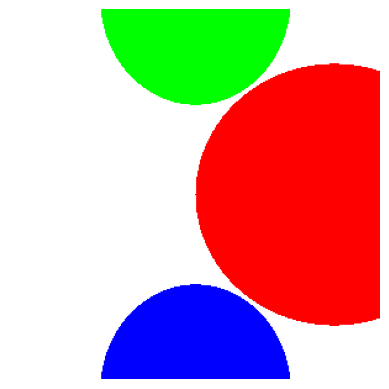

In [10]:
img = np.array(findPixels())
plt.axis("off")
plt.imshow(img)